# Climate Change

In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Is there a correlation between yearly global average temperature and yearly average global CO2 level ?
* Null hypothesis: There is no correlation between yearly global average temp and yearly average global CO2 levels
* Alternative hypothesis: There is a positive correlation between yearly global average temp and yearly average global CO2 levels

### If there is a correlation between an increase in global temperature and CO2 levels, then is there a relationship between a country’s average temperature and their CO2 level? Can we see a local effect on a country’s temperature from their CO2 levels?
* Null Hypothesis: A country’s increase in CO2 level does not increase the country’s average temperature (by year)
* Alternative Hypothesis: A country’s increase in CO2 level does increase the country’s average temperature.

### Is there a correlation between a country’s wealth (GDP per Capita) and its yearly average CO2 emissions? 
* Null hypothesis: Wealth of a country does not affect CO2 emissions. 
* Alternative hypothesis: The wealthier a country, the more CO2 they emit.

### Is there a correlation between global average temperature and global population? (population value to be taken at the end of each year)
* Null hypothesis: There is no correlation between global yearly average temp and global population.
* Alternative hypothesis: There is a positive correlation between global yearly average temp and global population.

Does this correlation (population vs temperature) exist in individual countries, or does this vary depending on location? Perfectly sets us up for the next 2Q’s

### Is there a correlation between a specific country’s CO2 levels and Temperature vs happiness Index? 
* Null hypothesis: There is no correlation between CO2 levels/Temperature and happiness index
* Alternative hypothesis: As CO2 levels/Temperature increases, citizens of a country is less happy 

### Is there a correlation between a country’s yearly average CO2 levels and life expectancy? Does a country’s CO2 level affect the life expectancy of a population?
* Null hypothesis: There is no correlation between a country’s yearly average CO2 level
* Alternative hypothesis: As CO2 levels increase, a population’s life expectancy decreases.
* Data: https://data.worldbank.org/indicator/SP.DYN.LE00.IN


In [2]:
lf_df = pd.read_csv("data_sets/Lifeexpectancy.csv")
for x in range(2016,2021):
    lf_df=lf_df.drop(columns=[f"{x}"])
lf_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.429000,74.576000,74.725000,74.87200,75.017,75.15800,75.299000,75.441000,75.583000,75.725000
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,58.826000,59.375000,59.930000,60.48400,61.028,61.55300,62.054000,62.525000,62.966000,63.377000
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,51.143000,52.177000,53.243000,54.31100,55.350,56.33000,57.236000,58.054000,58.776000,59.398000
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,75.423000,75.646000,75.912000,76.22100,76.562,76.91400,77.252000,77.554000,77.813000,78.025000
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.946341,69.197561,69.397561,69.64878,69.900,70.14878,70.497561,70.797561,71.097561,71.346341
260,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919,30.163,30.500,30.943,31.501,32.175,...,63.997000,64.470000,64.892000,65.25500,65.549,65.76800,65.920000,66.016000,66.066000,66.085000
261,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406,48.777,49.142,49.509,49.888,50.284,...,53.795000,54.452000,55.360000,56.46000,57.669,58.89500,60.060000,61.099000,61.968000,62.649000
262,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687,47.084,47.446,47.772,48.068,48.351,...,49.757000,51.134000,52.606000,54.13000,55.655,57.12600,58.502000,59.746000,60.831000,61.737000


In [3]:
co2_df = pd.read_csv("data_sets/CO2emission_percapita.csv")
for x in range(2016,2021):
    co2_df=co2_df.drop(columns=[f"{x}"])
co2_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.620372,208.822811,226.118079,214.800370,207.615777,185.203958,...,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.105019,1.203134,1.185000,1.234425,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,5.969786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.266386,4.650695,4.745656,4.672303,4.395272,4.441262,4.005283,4.702186
260,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.011038,0.013599,0.012729,0.014518,0.017550,0.017926,...,1.030386,0.985390,1.020428,1.090990,1.011975,0.865783,0.764021,1.013754,0.955251,0.497091
261,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727221,5.832621,5.887170,5.961336,6.332342,6.616544,...,9.236950,9.498786,9.979458,9.967159,9.173055,9.179457,8.794997,8.553336,8.882322,8.376655
262,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,0.946606,1.096876,...,0.188267,0.154271,0.168958,0.189800,0.197823,0.208412,0.254267,0.265078,0.292412,0.285428


In [4]:
co2_lf_df=lf_df.merge(co2_df,how="inner",on="Country Name", suffixes=('_lf', '_co2'))

In [5]:
co2_lf_df

,Country Name,Country Code_lf,Indicator Name_lf,Indicator Code_lf,1960_lf,1961_lf,1962_lf,1963_lf,1964_lf,1965_lf,...,2006_co2,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2,2015_co2
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,1.105019,1.203134,1.185000,1.234425,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,5.969786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.266386,4.650695,4.745656,4.672303,4.395272,4.441262,4.005283,4.702186
260,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919,30.163,30.500,30.943,31.501,32.175,...,1.030386,0.985390,1.020428,1.090990,1.011975,0.865783,0.764021,1.013754,0.955251,0.497091
261,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406,48.777,49.142,49.509,49.888,50.284,...,9.236950,9.498786,9.979458,9.967159,9.173055,9.179457,8.794997,8.553336,8.882322,8.376655
262,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687,47.084,47.446,47.772,48.068,48.351,...,0.188267,0.154271,0.168958,0.189800,0.197823,0.208412,0.254267,0.265078,0.292412,0.285428


In [6]:
co2_lf_df.dropna(inplace=True)

In [7]:
country=co2_lf_df["Country Name"].tolist()
country

['Aruba',
 'Afghanistan',
 'Angola',
 'Albania',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Belize',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Cyprus',
 'Djibouti',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia',
 'Ecuador',
 'Egypt, Arab Rep.',
 'Spain',
 'Ethiopia',
 'European Union',
 'Fragile and conflict affected situations',
 'Finland',
 'Fiji',
 'Gabon',
 'United Ki

In [8]:
co2_dict={}
lf_dict={}
co2_lf_df["1960_lf"][co2_lf_df["Country Name"]=="China"]

38    43.725
Name: 1960_lf, dtype: float64

In [9]:
for x in country:
    co2_dict[x]=[]
    lf_dict[x]=[]
    for y in range(1960,2015):
        co2_dict[x].append(co2_lf_df[f"{y}_co2"][co2_lf_df["Country Name"]==x].values[0])
        lf_dict[x].append(co2_lf_df[f"{y}_lf"][co2_lf_df["Country Name"]==x].values[0])

In [10]:
co2_dict

{'Aruba': [204.6203722,
  208.8228111,
  226.11807909999996,
  214.8003704,
  207.6157771,
  185.2039575,
  172.11995149999998,
  210.7790716,
  194.88749019999997,
  253.57911319999997,
  281.9957334,
  243.8703062,
  234.8865475,
  258.8198463,
  233.4889307,
  168.72903369999997,
  360.85323339999997,
  189.16340319999998,
  161.8036371,
  170.08326110000002,
  174.6975007,
  165.1049086,
  182.2590757,
  92.38097458,
  228.35589469999996,
  266.47510550000004,
  2.868319392,
  7.235198033,
  10.02617921,
  10.6347326,
  7.8474472639999995,
  8.22808022,
  7.899890086,
  8.952044025,
  8.605736636,
  8.81095314,
  8.726754807999999,
  8.883090894,
  9.24344329,
  9.105185102,
  26.19487524,
  25.93402441,
  25.67116178,
  26.42045209,
  26.51729342,
  27.20070778,
  26.94772597,
  27.89502282,
  26.22955267,
  25.91532206,
  24.67052887,
  24.50751622,
  13.15772231,
  8.353561008,
  8.410064177999999],
 'Afghanistan': [0.046056713,
  0.053588835,
  0.073720831,
  0.074160725,
  0.0

Text(0.5, 1.0, 'CO2 level vs life expectancy')

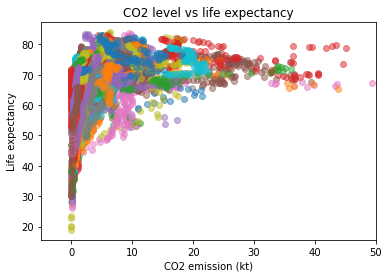

In [11]:
for x in country:
    plt.scatter(co2_dict[x], lf_dict[x], alpha=0.5)

plt.xlim(-5,50)
plt.xlabel("CO2 emission (kt)")
plt.ylabel("Life expectancy")
plt.title("CO2 level vs life expectancy")